In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df10 = pd.read_csv("./data/expectiminimax/10.csv")
df10['name'] = "Expectiminimax\n(10 samples)"
df10

,dropped,rows,name
0,15244,6324,Expectiminimax\n(10 samples)
1,17029,7086,Expectiminimax\n(10 samples)
2,500,200,Expectiminimax\n(10 samples)


In [24]:
df10.mean()

/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


dropped    10924.333333
 rows       4536.666667
dtype: float64

In [25]:
df = pd.read_csv("./data/greedy/genetic_weights.csv")
df['name'] = 'Greedy\n(depth = 1)'
df

,dropped,rows,name
0,617,241,Greedy\n(depth = 1)
1,7936,3287,Greedy\n(depth = 1)
2,905,363,Greedy\n(depth = 1)
3,404,153,Greedy\n(depth = 1)
4,14623,6071,Greedy\n(depth = 1)
5,20634,8579,Greedy\n(depth = 1)
6,449,171,Greedy\n(depth = 1)
7,7057,2926,Greedy\n(depth = 1)
8,531,211,Greedy\n(depth = 1)
9,4347,1801,Greedy\n(depth = 1)


In [26]:
df30 = pd.read_csv("./data/expectiminimax/10.csv")
df30['name'] = "Expectiminimax\n(30 samples)"
df30

,dropped,rows,name
0,15244,6324,Expectiminimax\n(30 samples)
1,17029,7086,Expectiminimax\n(30 samples)


In [27]:
concat = pd.concat([df30, df10, df])
concat

,dropped,rows,name
0,15244,6324,Expectiminimax\n(30 samples)
1,17029,7086,Expectiminimax\n(30 samples)
0,15244,6324,Expectiminimax\n(10 samples)
1,17029,7086,Expectiminimax\n(10 samples)
2,500,200,Expectiminimax\n(10 samples)
0,617,241,Greedy\n(depth = 1)
1,7936,3287,Greedy\n(depth = 1)
2,905,363,Greedy\n(depth = 1)
3,404,153,Greedy\n(depth = 1)
4,14623,6071,Greedy\n(depth = 1)


In [28]:
grouped = concat.groupby("name")
dropped = grouped.mean().sort_values("dropped", ascending=False)
rows = grouped.mean().sort_values(" rows", ascending=False)
dropped

,dropped,rows
name,,
Expectiminimax\n(30 samples),16136.500000,6705.000000
Expectiminimax\n(10 samples),10924.333333,4536.666667
Greedy\n(depth = 1),5621.300000,2329.700000


In [29]:
std_drop = grouped.std().sort_values("dropped", ascending=False)['dropped']
std_row = grouped.std().sort_values("dropped", ascending=False)[' rows']

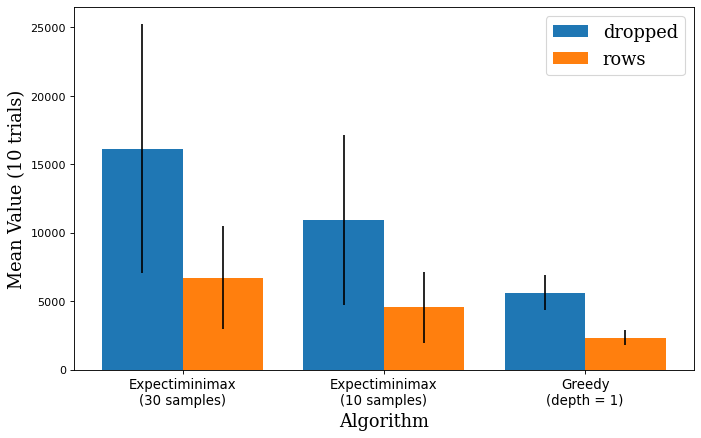

In [30]:
fig = plt.figure(figsize=(10, 6), dpi=80)

# ax = fig.add_axes([0,0,1,1])

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
font2 = {'family': 'serif',
#         'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

X_axis = np.arange(3)

plt.bar(X_axis - 0.2, dropped['dropped'], 0.4, yerr=std_drop, label="dropped")
plt.bar(X_axis + 0.2, rows[' rows'], 0.4, yerr=std_row, label="rows")
plt.xlabel("Algorithm", fontdict=font)
plt.xticks(X_axis, dropped.index, size=12)
plt.ylabel("Mean Value (10 trials)", fontdict=font)
plt.legend(prop=font2)
plt.savefig("expect.png")